# Hidden singularities in the solid state

_Authors: Andrew Cassidy (1), Frank P. Pijpers (2), David Field (3)_

1. [Center for Interstellar Catalysis, Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk/intercat)
2. [Korteweg-de Vries Institute for Mathematics, University of Amsterdam, NL]
3. [Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk)


### Abstract <a class="anchor" id="abstract"></a>
_A smooth function, governing how the experimental spontaneous polarization of solid films varies with deposition temperature, T, is shown to have the striking mathematical property that the differential can be singular. The differential is therefore not the slope of polarization vs T and minimum or maximum values of polarization are marked by singularities. These features, presently unique to any known physical system, are illustrated by films of cis-methyl formate, 1-butanol, 1-propanol and ammonia._


This letter concerns the properties of thin molecular films, formed by condensation from the gas phase. When composed of small dipolar species films exhibit spontaneous polarization, the so-called ‘spontelectric effect’.[1],[2],[3],[4],[5]<a class="anchor" id="ref_1_ff"></a> Our focus here is on the functional relationship between the degree of polarization of these films and their temperature of deposition, T. The degree of polarization may be represented as proportional, through the Langevin function,  to $Coth ( \xi/T ) - (\xi / T)^{-1}$, using atomic units. Here $\xi$ is the energy of interaction of an average dipole with the mean effective field in the film, where this field is itself a function of the degree of polarization. This however fosters a conceptual nightmare: the differential of the continuous function, $Coth(\xi / T) - (\xi / T)^{-1}$, is no longer its slope and minimum and maximum values are no longer marked by setting differentials to zero. Such pathological behaviour is well-documented in mathematics,  but not previously in physics. In addition, minimum and maximum values are not marked by setting differentials to zero, noting that such minima and maxima are observed experimentally. 

We demonstrate here that minimum or maximum numerical values of the governing function, in contrast to familiar extremes,  are described through the change in sign of the total differential of polarization _vs_ temperature, as it crosses a singularity. The presence, of maximum or minimum numerical values of polarization, becomes the signature of singular behaviour in the differential. Earlier work, involving films of _cis_-methyl formate (_cis_-MF) revealed the singular behaviour of the differential of the governing function,[2]<a class="anchor" id="ref_2"></a> but for some years remained the only such case. We have now three sets of experimental data, for _cis_-MF,[2]<a class="anchor" id="ref_2"></a> _1_-butanol and _1_-pentanol[4]<a class="anchor" id="ref_4"></a> which display the phenomenon discussed here, and also results which point to the same phenomenon in thin films of ammonia.  

The origin of polarization in thin films, deposited from the gas phase, is through dipole orientation in the bulk of the film.[2],[3]<a class="anchor" id="ref_2_ff"></a> The degree of orientation is dictated by competition between order and disorder. Order is created through intermolecular interactions and interactions of the molecular dipole with the self-generated spontelectric field. Disorder is represented through temperature. However the degree of dipole orientation does not monotonically decrease with increasing deposition temperature, as shown in [Fig. 1](#figure_1), but rather shows a minimum value at 75$\,$K to 77.5$\,$K. _1_-butanol and _1_-pentanol also exhibit counter-intuitive properties, exhibiting a weak maximum in orientation in the 30-40$\,$K deposition temperature range.[4]<a class="anchor" id="ref_4"></a>

The degree of dipole orientation is defined as the average component of the dipole moment in the _z_-direction, normal to the plane of the film, divided by the total dipole moment of the species in the solid, $\mu _{Z}/ \mu$, where $\mu$ is the dipole moment of a molecule in the solid state (see [S(i)](#figureS1). Components, in the _x-y_ plane of the film, average to zero. The polarization electric field,  $E_{spont}$, the ‘spontelectric field’, equal to the macroscopic polarization divided by $\mu_{0}$, arises from the voltage on the surface of the film. This voltage is generated by dipoles protruding into free space at the film/vacuum interface. The voltage may be either positive, as in _cis_-MF or NH$_{3}$, or negative, in _1_-pentanol and _1_-butanol, corresponding to positive or negative values of $\mu _{Z}/ \mu$. For example, with reference to _cis_-MF, the $\delta$-positive methyl group of methyl formate, (HC=O)–O–CH3, has a greater probability to extend from the surface, into vacuum, compared with the $\delta$-minus (HC=O)-O moiety. There is no free charge in the system and therefore $E_{spont}$ is constant and given by the surface voltage divided by the thickness of the film.[2]<a class="anchor" id="ref_2"></a>


### Figure 1: Temperature variation of $\mu _{Z}/ \mu$ for _cis_-methyl formate<a class="anchor" id="figure_1"></a>
Imports

In [1]:
from IPython.display import display, Markdown, Latex
import numpy, math, pandas 
import matplotlib.pyplot as plt
import glob

Define the relevant functions

In [138]:
def Langevin(x):
#
# the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^3)
#
    if (abs(x)>1.0e-6) :
        y=math.cosh(x)/math.sinh(x)-1/x
    else :
        y=x/3.0
    return y

def DerLangevin(x):
#
# the derivative of the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^2)
#
    if (abs(x)>1.0e-6) :
        auxden=1.0/math.sinh(x)
        y=-1.0*auxden*auxden+1/x/x
    else :
        y=1.0/3.0
    return y

def LangevInv(y):
#
# the inverse of the Langevin function for a single real argument y
# this uses an expression derived by Petrosyan (2017)
#
    if (abs(y)<1.0) :
        x=y*(3.0+y*math.sin(7.0*y/2.0)/5.0+y*y/(1-y))
        return x
    else :
        print("LangevInv: argument out of range, stopping.")
        return

def DerLangevInv(y):
#
# the derivative of the inverse of the Langevin function for a single real argument y
# this uses an expression for the inverse of the Langevin function derived by Petrosyan (2017)
#
    if (abs(y)<1.0) :
        x=3.0+2.0*y*math.sin(7.0*y/2.0)/5.0+7.0*y*y*math.cos(7.0*y/2.0)/10.0
        x+=(3.0-2.0*y)*y*y/(1-y)/(1-y)
        return x
    else :
        print("DerLangevInv: argument out of range, stopping.")
        return
    
def NeaterOut(x,s):
#
# prepares the strings for providing nicer-looking output of parameters with uncertainties
    spon=math.floor(math.log10(abs(s)))+1
    divis=math.exp(spon*math.log(10))
    xout=x/divis
    sout=s/divis
    string='({0:.2f}$\pm${1:.2f}) $10^{2:n}$'.format(xout,sout,spon)
    return string

def ConstrLSQ(x,y,wht):
#
# Solve a linear least squares problem for 1 dependent variable y as a function of
# nvar independent variables x.
# Linear least-squares problems for more than 1 parameter require a matrix inversion
# Here for arbitrary numbers of parameters the required matrix elements are 
# calculated and the matrix is inverted, after which the parameters are obtained.
# Input: a matrix x[nvar,ndat] containing ndat measurements of nvar independent
#           variables x
#        a vector y[ndat] containing the dependent variable
#        a vector of weights [ndat] which is used to give particular measurements 
#           less weight if desired. 
# NOTE: if a constant offset is required as one of the free parameters, an x-variable 
# which is all 1's must be present in (added to) the input matrix x.
#
    if (x.shape[1] != y.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return
    if (x.shape[1] != wht.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return

#
# declaration of local variables
    ndat=xdat.shape[1]
    nvar=xdat.shape[0]
    whtsum=0.0
    ysum=0.0
    xsum=numpy.array([0.0]*nvar)
    xysum=numpy.array([0.0]*nvar)
    xsqsum=numpy.array([[0.0]*2,[0.0]*2])
    Ainv=numpy.array([[0.0]*2,[0.0]*2])
    par=numpy.array([0.0]*nvar)
#
# weighted sum of measurements of dependent variable 
    for i in range(0,ndat):
        ysum+=y[i]*wht[i]
#
# weighted sum of measurements of independent variables and of cross-products on independent variables
# with each other and with dependent variable.
    for k in range(0,nvar):
        for i in range(0,ndat):
            whtsum+=wht[i]
            xsum[k]+=x[k,i]*wht[i]
            xysum[k]+=x[k,i]*y[i]*wht[i]
        for l in range(0,nvar):
            for i in range(0,ndat):
                xsqsum[k,l]+=x[k,i]*x[l,i]*wht[i]
#
# start solving the set of linear equations for the linear least squares problem
    if (nvar==1) :
#
# if only one parameter to be determined
        par[0]=ysum/xsum[0]
    else:
#
# for determination of 3 parameters
        if (nvar==2) :
            Det=xsqsum[0,0]*xsqsum[1,1]-xsqsum[1,0]*xsqsum[0,1]
            if (abs(Det)>1.0e-9) :
                Ainv[0,0]=xsqsum[1,1]/Det
                Ainv[0,1]=-1.0*xsqsum[0,1]/Det
                Ainv[1,0]=-1.0*xsqsum[1,0]/Det
                Ainv[1,1]=xsqsum[0,0]/Det
                par[0]=Ainv[0,0]*xysum[0]+Ainv[0,1]*xysum[1]
                par[1]=Ainv[1,0]*xysum[0]+Ainv[1,1]*xysum[1]
            else :
                print("ConstrLSQ: singular matrix. stopping")
                par=numpy.array([])
                return
        else :
#
# the general case of 3 or more parameters to be determined.
            Ainv=numpy.linalg.inv(xsqsum)
            par=numpy.dot(Ainv,xysum)
#
    return par

# Main driver programme for fitting Spontelectric field data
# 
# Define several conversion factors to/from atomic units
# conversion of Temp to a.u. : T [a.u.]= T [K]/factor
Ttoau=315770.0
# conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
Debye=0.393456
# Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
Etoau=5.142e11
#

describe the plot settings

In [139]:
def FigureE(x,y,z,xmin,xmax,ymin,ymax,title):
#
# make a plot of the measured and modelled field
#
    fig, ax = plt.subplots(figsize=(10, 5.4))
    #plt.title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.scatter(x, z, marker='o', s=40, color='red', label='observed')
    ax.scatter(x, y, marker='+', s=40, color='blue', label='model')
    
    ax.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax.set_ylabel('Electric Field / Vm$^{-1}$', fontsize=16, fontname='garamond')
    ax.tick_params(labelsize='large')
    ax.legend(loc=2, fontsize=14, framealpha=0)
    
    plt.savefig('E field variation for cis MF f(T)')
    return

def FigureMu(x,y,z,sigx,sigy,xmin,xmax,ymin,ymax,title):
#
# make a plot of the measured and modelled z-component of mu
#
    fig, ax = plt.subplots(figsize=(10, 5.4))
    #plt.title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.errorbar(x, z, markersize=10, xerr=sigx, yerr=sigy, fmt='.', color='red', label='observed')
    ax.scatter(x, y, marker='^', s=50, color='blue', label='model')
    ax.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax.set_ylabel('Dipole orientation / $\mu_Z/\mu$', fontsize=16, fontname='garamond')
    ax.set_yticks([0.01,0.02,0.03,0.04])
    ax.tick_params(labelsize='large')
    ax.legend(loc=2, fontsize=14, framealpha=0)
    
    plt.savefig('dipole orientation for cis MF f(T)')
    return

#

The function $h(T)$ (htfc in the code) is used to accomodate that $\zeta$ can be a function of $T$. $h(T)\equiv 1$ for ammonia, and a third order polynomial for $cis$-methyl formate: 
\begin{equation}
\zeta  = \zeta_0 \left[c_0 + c_1 T + c_2 T^2 + c_3 T^3 \right]
\end{equation}
with values, below 80 K:
\begin{eqnarray}
c_0 &\equiv& 1 \\
c_1 &=& -760.113756613971/29449.2222222259 \approx -2.5811\ 10^{-2}\\
c_2 &=& -0.245238095233991/29449.2222222259\approx -8.3275\ 10^{-6}\\
c_3 &=& 0.157407407407381/29449.2222222259 \approx 5.345\ 10^{-6}\\
\end{eqnarray}
and above 80 K:
\begin{eqnarray}
c_0 &\equiv& 5.5417\ 10^2 \\
c_1 &=& -1.7972 10^{1}\\
c_2 &=& 1.9423\ 10^{-1}\\
c_3 &=& -6.9917\ 10^{-4}\\
\end{eqnarray}

\[include reference here where this comes from\]

In [4]:
# Read the data for a particular ice from file
#
# for cis-methyl formate the parameter zeta is not constant but a function of 
# temperature. The T dependence is fixed (cubic with 3 pars)

# cis-methyl formate
SpontelData_cisMF = pandas.read_excel("Data\DataForCisMF.xlsx")
# Provide the value of mu for this ice 
IceMu=0.354
# Provide a first guess value for the parameter E_A
EAnxt=1.118e9
# Define the function to adjust zeta as a function of temperature
#
SpontelData_cisMF.head()

,weight,y,sigma_y,Temperature,sigma_T,Observed_field
0,1.0,0.015232,0.00400,55.0,0.1,19569000
1,1.0,0.012198,0.00400,57.0,0.1,15672000
2,1.0,0.008909,0.00080,60.0,0.1,11446000
3,1.0,0.007217,0.00080,63.0,0.1,9271800
4,1.0,0.005620,0.00008,65.0,0.1,7220500


In [7]:

def cisMFhtfc(T):
#
# functional form for zeta, with different forms for temperatures below and above 80 K. The form for 
#        zeta = 29449.2 -760.113756613971 T -0.245238095233991 T^2 + 0.157407407407381 T^3
# and above 80
#        zeta = 1.632e7 – 5.2925e5 T + 5719.9 T^2 – 20.59 T^3
# the two forms are rearranged to still match at a temperature (just below) 80 K with a single value
# of the fitting parameter zeta_0
# input for the function is the temperature in K
#
    htfc=numpy.array([0.0]*4)
    if (T<79.797) :
#
# c_1 = -760.113756613971/29449.2222222259 =-2.5811e-2
# c_2 = -0.245238095233991/29449.2222222259 = -8.3275e-6
# c_3 = 0.157407407407381/29449.2222222259 = 5.345e-6
#
        htfc[0]=1.0
        htfc[1]=-2.5811e-2
        htfc[2]=-8.3275e-6
        htfc[3]= 5.345e-6
    else :
        htfc[0]=5.5417e2
        htfc[1]=-1.7972e1
        htfc[2]=1.9423e-1
        htfc[3]=-6.9917e-4
#
    return htfc



main driver programme for fitting Spontelectric field data

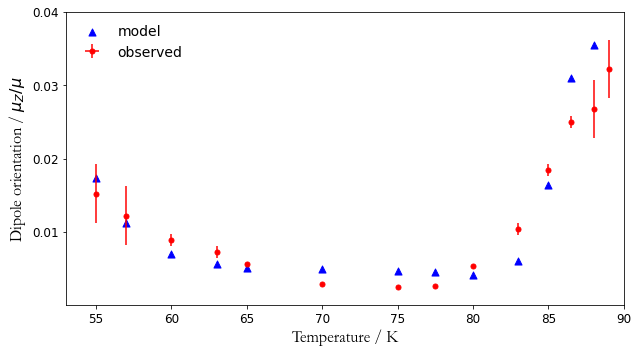

In [190]:
weight=numpy.array(SpontelData_cisMF.weight)
ndata=len(weight)
# y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
# sig are the 1-sigma measurement errors
# E observed is the observed Electric field in units [V/m]
y=numpy.array(SpontelData_cisMF.y)
sigy=numpy.array(SpontelData_cisMF.sigma_y)
Temp=numpy.array(SpontelData_cisMF.Temperature)
sigT=numpy.array(SpontelData_cisMF.sigma_T)
Eobs=numpy.array(SpontelData_cisMF.Observed_field)
#
# here comes a block of variable declarations
whtsum=0.0
hTfunc=numpy.array([0.0]*ndata)
DerhTfunc=numpy.array([0.0]*ndata)
DerGT=numpy.array([0.0]*ndata)
DerGy=numpy.array([0.0]*ndata)
PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
ydat=numpy.array([0.0]*ndata)
zdat=numpy.array([0.0]*ndata)
ymodel=numpy.array([0.0]*ndata)
DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
SigPar=numpy.array([0.0]*3)
#
#
# Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
# The are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
# partial derivatives of the function G with respect to T and y.
for i in range(0,ndata):
    whtsum+=weight[i]
    htfc=cisMFhtfc(Temp[i])
    hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
    DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
    PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
    PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
    PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
    PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
#
# start the iteration to get the parameters, initialise a choice for E_A
EAcur=1.1*EAnxt
itcnt=0
while ((abs(EAnxt/EAcur-1.0)>1.0e-3) and (itcnt<20)) :
    itcnt+=1
    EAcur=EAnxt
    for i in range(0,ndata):
        xdat[0,i]=PartDerv[1,i]
        xdat[1,i]=PartDerv[3,i]
        ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
#
    Constrout=ConstrLSQ(xdat,ydat,weight)
#
    EScur=Constrout[0]*Etoau
    ESzetacur=Constrout[1]*Etoau
    ratiolog=0.0
    for i in range(0,ndata) :
        Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
        ratiolog+=weight[i]*(math.log(EAcur*Langevin(Ezmod))-math.log(Eobs[i]))
        DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
        DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
        DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
        DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
    ratiolog=ratiolog/whtsum
    EAnxt=EAcur/math.exp(ratiolog)
#
# G(T,y)\equiv\left(1-y\right)L^{-1}(y)-\frac{\mu}{T}\left\{ E_S\left[1-y+\zeta (y^2 -y^3)\right] 
#          -E_A(y-y^2) \right\}
# dG/dy=-L^{-1}(y)+\left(1-y\right)\frac{\d L^{-1}(y)}{dy}-\frac{\mu}{T}\left\{ 
#           E_S\left[-1+\zeta h(T) (2y -3y^2)\right] -E_A(1-2y) \right\}
# dG/dT=\frac{\mu}{T^2}\left\{ E_S\left[1-y+\zeta_0 h(T) (y^2 -y^3)\right] -E_A(y-y^2) \right\}-\frac{\mu}{T}
#           E_S\zeta_0\frac{d h(T)}{dT} (y^2 -y^3)
#
# for the calculation of the uncertainty margins for the parameters the partial derivatives below are needed
#
# also calculate the quality of the fit (chi-square) dlsqsum
dlsqsum=0
for i in range(0,ndata) :
    ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
    DelMod=y[i]-ymodel[i]
    dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
    #print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
    DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
    DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
    DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
    DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
    DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
    DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
#
dlsqsum=dlsqsum/(whtsum-2)
# calculate the 1-sigma uncertainties for the parameters
for k in range(0,3):
    for i in range(0,ndata) :
        SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
    SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)

zetacur=ESzetacur/EScur
SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)

EScisMF=NeaterOut(EScur,SigPar[0])
EAcisMF=NeaterOut(EAcur,SigPar[1])
zetacisMF=NeaterOut(zetacur,SigPar[2])

string="$E_S =$"+NeaterOut(EScur,SigPar[0])
string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
string+="<br>"+"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
string+="<br><br>"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
#display(Markdown(string)) #use this line to see the answer


# make the figure 1
FigureMu(Temp,ymodel,y,sigT,sigy,53,90,0.0,0.04,'cis-methyl formate')
ymodellst=ymodel.tolist()
ymodel=EAcur*ymodel
#FigureE(Temp,ymodel,Eobs,53,90,0.0,5.0e7,'cis-methyl formate')

#Turn these ouputs into a dictionary for use elsewhere in the paper
Templst=Temp.tolist()
sigTlst=sigT.tolist()
ylst=y.tolist()
sigylst=sigy.tolist()
Eobslst=Eobs.tolist()
Emodellst=ymodel.tolist()

list_output=[Templst,sigTlst,ylst,sigylst,ymodellst,Eobslst,Emodellst]
columns = ['Temperature','sig T','y','sigy','ymodel','Eobs','Emodel']
dct = {'cisMF':list_output}





**Figure 1**: _The variation of the degree of dipole orientation, $\mu _{Z}/ \mu$, as a function of deposition temperature for cis-methyl formate. Experimental data are derived from direct measurement of film surface potentials. See [S(iv)](#figureS1) for details on how the fit was constructed. Values of fitting parameters are given in [Table 1](#Table1). Note that values of $\mu _{Z}/ \mu$ are unstable for deposition temperatures $\ge$ 80$\,$K, decaying by ~50% on a timescale of an hour, after an initial period of stability of ~2000 seconds.[2]<a class="anchor" id="ref_2"></a>_

The spontelectric model, outlined below, has proven successful in analysing data for the variation of spontelectric fields with deposition temperature,[2]<a class="anchor" id="ref_2"></a> Stark shifts in reflection-absorption infrared spectroscopy (RAIRS),  vacuum ultraviolet spectroscopy of films of NH$\_{3}$[10]<a class="anchor" id="ref_10"></a> and secondary relaxation in glassy _cis_-MF.[11]<a class="anchor" id="ref_11"></a> RAIRS experiments  have confirmed the increase in dipole orientation in _cis_-MF for deposition temperatures $\ge$ 80$\,$K shown in [Fig. 1](#figure_1).

In a spontelectric solid, molecules are subject to a mean field, _E<sub>z</sub>_, whose value contains three terms: first a term defining the interactions which bind layers together, associated with polarization, dispersion and covalent interactions, second, a term explicitly involving the dipole-dipole interaction, proportional to $(\mu _{Z}/ \mu)^{2}$, and third, a term representing the spontelectric field itself and proportional to $\mu _{Z}/ \mu$. Thus the mean field Hamiltonian for the system, $\xi$, is given by the energy of interaction of the dipole, $\mu$, in this mean effective field and we write $\xi$ as:

<a class="anchor" id="equation_1"></a>
\begin{align}
\mathrm{(1)} \quad \xi = \mu E_{Z} = \mu \left[ E_{S} \left[ 1+ \zeta(\frac{<\mu_z>}{\mu})^{2} \right]  - E_{A}\frac{<\mu_z>}{\mu} \right]
\end{align}

where _E<sub>S</sub>_, $\zeta$ and _E<sub>A</sub>_ are three parameters to be determined by fitting to experimental data and additionally, for _E<sub>S</sub>_, appeal to theory. Since the surface bound charge gives rise to the surface potential and the spontelectric field is proportional to the degree of dipole orientation, this leads to _E<sub>spont</sub> = E<sub>A</sub>$\mu _{Z}/ \mu$_. The value of $\mu _{Z}/ \mu$ is given by the Langevin function, writing $\xi = \mu$_E<sub>z</sub>_. The film settles down to a configuration corresponding to a balance between the short range and long range terms in the mean field Hamiltonian and thermal agitation. The governing equation therefore has the form $f(T,\mu_{z}/\mu) = \mu _{Z}/ \mu$, an implicit equation containing feedback, through which the behaviour of orientation with deposition temperature depends on the degree of orientation itself.

An explicit expression for $f(T,\mu_{z}/\mu)$ is obtained directly by substitution of _E<sub>z</sub>_, from [Eqn.1](#equation_1), into the Langevin function: see [S(ii)](equation_S2). We seek the differential of $f(T,\mu_{z}/\mu)$ with respect to _T_, and this yields

<a class="anchor" id="equation_2"></a>
\begin{align}
\mathrm{(2)} \quad \frac{d(\mu_{Z} / \mu)}{dT} = \left[ - \frac{\mu E_{Z}}{T^{2}} Cosech^{2}(\mu E_{Z}/T^{2}) + (\mu E_{Z})^{-1} \right] / \Phi
\end{align}

where _E<sub>z</sub>_ is given by [Eqn. 1](#equation_1) and 

<a class="anchor" id="equation_3"></a>
\begin{align}
\mathrm{(3)} \quad \Phi = \frac{T \left[ 2 \zeta (\mu _{Z}/ \mu)E_{S} - E_{A} \right]}{\mu E_{Z}^{2}} - \frac{\mu}{T} \left[ 2 \zeta (\mu _{Z}/ \mu)E_{S} - E_{A} \right] Cosech^{2}(\frac{\mu E_{Z}}{T}) -1 
\end{align}

We show in [S3](#S3) that the nominator in [Eqn. 2](#equation_2) cannot equal zero, for any combination of non-zero _T_ and $\mu _{Z}/ \mu$ or real values of parameters _E<sub>S</sub>, E<sub>A</sub>_ or $\zeta$. Thus, we are faced with the property that [Fig. 1](#figure1) shows that $\mu _{Z}/ \mu$ vs _T_ displays a minimum value, or equally maximum values in data for _1_-pentanol and _1_-butanol, but that $\frac{d(\mu_{Z} / \mu)}{dT}$ cannot equal zero. The form of [Eqn. 2](#equation_2) is such that the differential tends to infinity as $\Phi$ tends to zero. Referring for example to _cis_-MF, to the low temperature side of the condition that $\Phi$ tends to zero, $\frac{d(\mu_{Z} / \mu)}{dT}$ is negative and to the high temperature side, $\frac{d(\mu_{Z} / \mu)}{dT}$ is positive. This generates a minimum value in $\mu _{Z}/ \mu$ vs _T_. The signs of $\frac{d(\mu_{Z} / \mu)}{dT}$ are reversed for _1_-pentanol or _1_-butanol which show a maximum (negative) value of $\mu _{Z}/ \mu$.

We obtain the values of parameters _E<sub>S</sub>, E<sub>A</sub>_ and $\zeta$, by fitting ([S4](#S4)) to experimental data vs deposition temperature for _cis_-MF, _1_-butanol and _1_-pentanol[2]<a class="anchor" id="ref_4"></a>,[4]<a class="anchor" id="ref_4"></a> and ammonia.[10]<a class="anchor" id="ref_10"></a> For the glassy materials _cis_-MF, _1_-butanol and _1_-pentanol, we constrain _E<sub>S</sub>_ and _E<sub>A</sub>_ to be independent of deposition temperature. The parameter $\zeta$ may however be temperature dependent. For NH<sub>3</sub>, all three parameters are treated as temperature independent, for the higher temperature phase formed at $T > 50\,K$, the phase of interest here.[10]<a class="anchor" id="ref_10"></a> 




### Table 1: Spontelectric parameters for different species <a class="anchor" id="table_1"></a>

run the main driver program for fitting the spontelectric model on multiple datasets

In [195]:
SpontelData_dict = pandas.read_excel('Data\\DataforAll.xlsx', sheet_name=None)
lst=[]

for name, sheet in SpontelData_dict.items():
    
    SpontelData = SpontelData_dict[name]
    #display(SpontelData.head()) #Use this line if you want to see the first few lines of each data file
    #
    # Main driver programme for fitting Spontelectric field data
    # 
    # Define several conversion factors to/from atomic units
    # conversion of Temp to a.u. : T [a.u.]= T [K]/factor
    Ttoau=315770.0
    # conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
    Debye=0.393456
    # Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
    Etoau=5.142e11
 
    htfc=numpy.array([0.0]*4)
 
    # Provide the value of mu for this ice 
    IceMu=0.577
    # Provide a first guess value for the parameter E_A
    EAnxt=5.49e9
    #
    htfc[0]=1.0
    htfc[1]=0.0
    htfc[2]=0.0
    htfc[3]=0.0
    
    #
    weight=numpy.array(SpontelData.weight)
    ndata=len(weight)
    # y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
    # sig are the 1-sigma measurement errors
    # E observed is the observed Electric field in units [V/m]
    y=numpy.array(SpontelData.y)
    sigy=numpy.array(SpontelData.sigma_y)
    Temp=numpy.array(SpontelData.Temperature)
    sigT=numpy.array(SpontelData.sigma_T)
    Eobs=numpy.array(SpontelData.Observed_field)
    #
    # here comes a block of variable declarations
    whtsum=0.0
    hTfunc=numpy.array([0.0]*ndata)
    DerhTfunc=numpy.array([0.0]*ndata)
    DerGT=numpy.array([0.0]*ndata)
    DerGy=numpy.array([0.0]*ndata)
    PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
    ydat=numpy.array([0.0]*ndata)
    zdat=numpy.array([0.0]*ndata)
    ymodel=numpy.array([0.0]*ndata)
    DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    SigPar=numpy.array([0.0]*3)
    #
    #
    # Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
    # The are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
    # partial derivatives of the function G with respect to T and y.
    for i in range(0,ndata):
        whtsum+=weight[i]
        hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
        DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
        PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
        PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
        PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
        PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
    #
    # start the iteration to get the parameters, initialise a choice for E_A
    EAcur=1.1*EAnxt
    itcnt=0
    while ((abs(EAnxt/EAcur-1.0)>1.0e-3) and (itcnt<20)) :
        itcnt+=1
        EAcur=EAnxt
        for i in range(0,ndata):
            xdat[0,i]=PartDerv[1,i]
            xdat[1,i]=PartDerv[3,i]
            ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
    #
        Constrout=ConstrLSQ(xdat,ydat,weight)
    #
        EScur=Constrout[0]*Etoau
        ESzetacur=Constrout[1]*Etoau
        ratiolog=0.0
        for i in range(0,ndata) :
            Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
            ratiolog+=weight[i]*(math.log(EAcur*Langevin(Ezmod))-math.log(Eobs[i]))
            DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
            DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
            DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
            DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
        ratiolog=ratiolog/whtsum
        EAnxt=EAcur/math.exp(ratiolog)
    #
    # G(T,y)\equiv\left(1-y\right)L^{-1}(y)-\frac{\mu}{T}\left\{ E_S\left[1-y+\zeta (y^2 -y^3)\right] 
    #          -E_A(y-y^2) \right\}
    # dG/dy=-L^{-1}(y)+\left(1-y\right)\frac{\d L^{-1}(y)}{dy}-\frac{\mu}{T}\left\{ 
    #           E_S\left[-1+\zeta h(T) (2y -3y^2)\right] -E_A(1-2y) \right\}
    # dG/dT=\frac{\mu}{T^2}\left\{ E_S\left[1-y+\zeta_0 h(T) (y^2 -y^3)\right] -E_A(y-y^2) \right\}-\frac{\mu}{T}
    #           E_S\zeta_0\frac{d h(T)}{dT} (y^2 -y^3)
    #
    # for the calculation of the uncertainty margins for the parameters the partial derivatives below are needed
    #
    # also calculate the quality of the fit (chi-square) dlsqsum
    dlsqsum=0
    for i in range(0,ndata) :
        ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
        DelMod=y[i]-ymodel[i]
        dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
        #print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
        DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
        DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
        DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
        DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
        DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
        DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
    #
    dlsqsum=dlsqsum/(whtsum-2)
    # calculate the 1-sigma uncertainties for the parameters
    for k in range(0,3):
        for i in range(0,ndata) :
            SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
        SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)

    #FigureMu(Temp,ymodel,y,sigT,sigy,46,84,0.0,0.05,name)
    #ymodel=EAcur*ymodel
    #FigureE(Temp,ymodel,Eobs,46,84,0.0,2.0e8,name)
    
    zetacur=ESzetacur/EScur
        
    SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
    string = name
    string+="<br>"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
    string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
    string+="<br>"+"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
    string+="<br><br>"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
    #display(Markdown(string))  #Use this line to see the individual results for fitting parameters per dataset
    
    ES=NeaterOut(EScur,SigPar[0])
    EA=NeaterOut(EAcur,SigPar[1])
    zeta=NeaterOut(zetacur,SigPar[2])
    
    lst +=[[name,IceMu,ES,EA,zeta]]
    
    #Turn these ouputs into a dictionary for use elsewhere in the paper
    #Note not working yet
    #Templst=Temp.tolist()
    #sigTlst=sigT.tolist()
    #ylst=y.tolist()
    #sigylst=sigy.tolist()
    #Eobslst=Eobs.tolist()
    #Emodellst=ymodel.tolist()

    #list_output=[Templst,sigTlst,ylst,sigylst,ymodellst,Eobslst,Emodellst]
    #columns = ['Temperature','sig T','y','sigy','ymodel','Eobs','Emodel']
    #new_dct={name:list_output}
    

    


Create the table with all entries

In [196]:
lst += [["cis-Methyl Fomate",0.354,EScisMF,EAcisMF,zetacisMF]]
col_head = ['Molecule','Diplole Moment / D','Es / Vm-1','EA / Vm-1','zeta']
df=pandas.DataFrame(lst, columns = col_head)
df.set_index('Molecule', inplace = True)
df


,Diplole Moment / D,Es / Vm-1,EA / Vm-1,zeta
Molecule,,,,
ammonia,0.577,(26.55$\pm$0.66) $10^6$,(5.51$\pm$0.13) $10^9$,(1.66$\pm$0.11) $10^4$
N2O,0.577,(22.77$\pm$0.48) $10^6$,(54.90$\pm$0.97) $10^8$,(20.81$\pm$0.98) $10^3$
1-butanol,0.577,(26.55$\pm$0.66) $10^6$,(5.51$\pm$0.13) $10^9$,(1.66$\pm$0.11) $10^4$
1-pentanol,0.577,(26.55$\pm$0.66) $10^6$,(5.51$\pm$0.13) $10^9$,(1.66$\pm$0.11) $10^4$
cis-Methyl Fomate,0.354,(0.98$\pm$0.20) $10^7$,(1.20$\pm$0.15) $10^9$,(1.27$\pm$0.32) $10^4$


**Table 1**: _Column 2: dipole moments, $\mu$, of molecules in the solid. Columns 3, 4 and 5: values of parameters, in the Hamiltonian in [Eqn. 1](#equation_1), defining the mean field in solid films of cis-methyl formate[4],[13], 1-butanol and 1-pentanol,[4] and ammonia (NH<sub>3</sub>).[10]  Parameters for nitrous oxide for T $\ge$ 48$\,$K  are included for comparison. Errors in values of parameters leading to corresponding errors in values of the degree of dipole orientation, $\mu _{Z}/ \mu$, of $\pm$ 10% to 15% for cis-MF (see [Fig. 1](#figure_1)) and $\pm$ 5% for NH<sub>3</sub>. The two different sets of E<sub>S</sub>, E<sub>A</sub> and $\zeta$, (i) and (ii), for NH<sub>3</sub> arise from values derived using the methods outlined in [S4](#S4), using different weightings of the data in the least squares fitting procedure. Errors, both systematic and random, associated with 1-butanol and 1-pentanol values cannot be readily assessed, since these depend on the quantities, such as molecular spacing, which are not accurately known; see [S1](S1)._ 

We now seek to identify the temperature of deposition and associated degree of orientation which lead to singularities in $\frac{d(\mu_{Z} / \mu)}{dT}$, subject to $\Phi$ = 0 and $f(T,\mu_{z}/\mu) = \mu _{Z}/ \mu$. Turning first to _cis_-MF, using a single set of values of parameters, _E<sub>S</sub>_, _E<sub>A</sub>_ and $\zeta$, we reproduce the general experimental form of $\mu _{Z}/ \mu$ vs T [Fig. 1](#figure_1) for the full range of deposition temperature between 55$\,$K and 89$\,$K. In particular, if we restrict our determination of temperature independent values of _E<sub>S</sub>_, _E<sub>A</sub>_ and $\zeta$ to those based upon values of orientation measured below 75$\,$K, that is, below the minimum value of $\mu _{Z}/ \mu$, then the rapid rise in orientation at T $\ge$ 80$\,$K follows directly.[2]<a class="anchor" id="ref_2"></a> 

To create a more quantitative fit to data for _cis_-MF, we refer to experimental data for the decay of dipole orientation with time in _cis_-MF.  These show that the extent to which molecules are restricted in their angular motion, represented by the term involving $\zeta(\mu _{Z}/ \mu)^{2}$ in [Eqn. 1](#equation_1), is deposition temperature dependent and that this dependence may be wholly attributed to the temperature dependence of $\zeta$.[11]<a class="anchor" id="ref_11"></a>  This parameter rises from 1.31 x 10<sup>4</sup> at 55$\,$K to 4.77 x 10<sup>4</sup> at 80$\,$K. At T $\ge$ 8$\,$K, self-diffusion of molecules within the glassy material becomes measureable, with a diffusion coefficient > 10-20$\,$cm<sup>2</sup>s<sup>-1</sup>, climbing rapidly as T increases.[15]<a class="anchor" id="ref_15"></a>  Diffusion implies freedom of motion and is accompanied by a decay of $\zeta$, which reverts at 89$\,$K to 1.16 x 10<sup>4</sup>, close to its low temperature value of 1.31 x 10<sup>4</sup> at 55$\,$K. Thus increased self-diffusion mirrors the growth in orientation in the temperature range > 80$\,$K, see [S5](#S5). The minimum experimental value of $\mu _{Z}/ \mu$ = 0.0026 $\pm$ 0.0001 [Fig. 1](#figure_1) is found to occur between 75$\,K$ and 77.5$\,$K. The fitted value is 0.00405 $\pm$ 0.00004, reproduced using T = 78.3$\,$K obtained with $\zeta$ = 4.40 x 10<sup>4</sup> on solution of $\Phi$ = 0.

We turn now to the glassy solids _1_-butanol and _1_-pentanol,[4]<a class="anchor" id="ref_4"></a>  between 32$\,$K and 48$\,$K in which maximum negative values of orientation were observed. Results, based on Kelvin probe measurements, may be expressed as electric fields. For example the value of the spontelectric field, _E<sub>spont</sub>_, is estimated 1.24 x 10<sup>8</sup> Vm<sup>-1</sup> for _1_-pentanol at 40$\,$K.  Here we use $E_{A} = 4\pi \mu / \Omega$, in atomic units, as derived in [2]<a class="anchor" id="ref_2"></a> , rather than fitting, where $\mu$ is the solid state dipole and $\Omega$ is the molecular volume, itself related to the polarizability, $\alpha$,  see [S1](S1) and [S5](S5). We find that E<sub>A</sub> = -2.834 x 10<sup>9</sup> Vm<sup>-1</sup> for _1_-butanol and -2.676 x 10<sup>9</sup> Vm<sup>-1</sup> for _1_-pentanol. Since $E_{spont} = E_{A}\frac{\mu _{Z}}{\mu}$, this allows the evaluation of $\mu _{Z}/ \mu$ for _1_-butanol and _1_-pentanol shown in [Table 2](#table_1). These demonstrate maxima at 36$\,$K for _1_-butanol and at 40$\,$K for _1_-pentanol. 



### Table 2: Dipole alignment for two alcohols<a class="anchor" id="table_2"></a>

extract the relevant data from the model used to construct [table 1](#table_1)